In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [18]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [8]:
data = pd.DataFrame(ground_cricket_data)

In [13]:
model = linear_model.LinearRegression()
model.fit(data["Chirps/Second"].to_frame(), data["Ground Temperature"])
model.score(data["Chirps/Second"].to_frame(), data["Ground Temperature"])

0.69229465291470027

Ground Tempreature = [ 3.410323] * Chirps/Second + 22.848982308066887


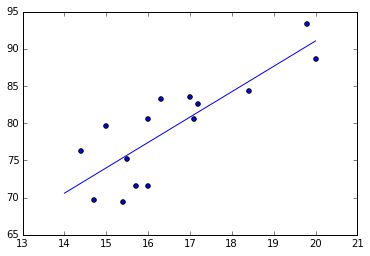

In [21]:
plt.scatter(data["Chirps/Second"], data["Ground Temperature"])
plt.plot(range(14, 21), model.predict(pd.DataFrame(np.array(range(14, 21)))))
print("Ground Tempreature = {} * Chirps/Second + {}".format(model.coef_, model.intercept_))

## The data does appear to support the hypothesis that circkets chirp more frequently the higher the temperature is.

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
df = pd.read_fwf("brain_body.txt")

In [26]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [29]:
model = linear_model.LinearRegression()
model.fit(df["Brain"].to_frame(), df["Body"])
model.score(df["Brain"].to_frame(), df["Body"])

0.87266208430433312

## The brain weight appears to be a fairly accurate predictor for body weight

Body Weight = [ 0.96649637] * Brain Weight + 91.00439620740681


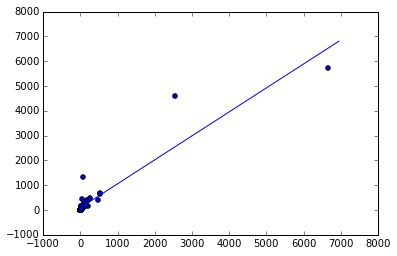

In [32]:
plt.scatter(df["Brain"], df["Body"])
plt.plot(range(0, 7000, 50), model.predict(pd.DataFrame(np.array(range(0, 7000, 50)))))
print("Body Weight = {} * Brain Weight + {}".format(model.coef_, model.intercept_))

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [37]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [34]:
model = linear_model.LinearRegression()

In [39]:
model.fit(df.drop("Salary", 1), df.Salary)
model.score(df.drop("Salary", 1), df.Salary)

0.85471806744109691

In [43]:
model.fit(df.drop(["Salary", "Sex"], 1), df.Salary)
model.score(df.drop(["Salary", "Sex"], 1), df.Salary)

0.8485077204335425

## Sex appears to be an insignificant factor in determining salary